Question 1

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/penguins/master/penguins.csv"
penguins = pd.read_csv(url)

# Create a function to plot histogram with statistics
def plot_flipper_length_histogram(species_data, species_name):
    # Calculate statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    iqr = species_data['flipper_length_mm'].quantile(0.75) - species_data['flipper_length_mm'].quantile(0.25)
    std_dev = species_data['flipper_length_mm'].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Create histogram
    fig = go.Figure(data=[go.Histogram(x=species_data['flipper_length_mm'], nbinsx=15)])

    # Add mean and median lines
    fig.add_hline(y=0, x=mean, line_color='red', line_dash='dash', annotation_text='Mean', annotation_position='top right')
    fig.add_hline(y=0, x=median, line_color='blue', line_dash='dash', annotation_text='Median', annotation_position='top right')

    # Add rectangles for IQR and range
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    fig.add_rect(x0=q1, y0=0, x1=q3, y1=species_data['flipper_length_mm'].value_counts().max(),
                 fillcolor='yellow', opacity=0.5, line_width=0, annotation_text='IQR', annotation_position='top right')
    fig.add_rect(x0=min_val, y0=0, x1=max_val, y1=species_data['flipper_length_mm'].value_counts().max(),
                 fillcolor='lightgray', opacity=0.5, line_width=0, annotation_text='Range', annotation_position='top right')
    fig.add_rect(x0=lower_bound, y0=0, x1=upper_bound, y1=species_data['flipper_length_mm'].value_counts().max(),
                 fillcolor='green', opacity=0.3, line_width=0, annotation_text='±2 Std Dev', annotation_position='top right')

    # Update layout
    fig.update_layout(title=f'Flipper Length Histogram for {species_name}',
                      xaxis_title='Flipper Length (mm)',
                      yaxis_title='Count')

    return fig

# Plot for each species
species_list = penguins['species'].unique()
figs = [plot_flipper_length_histogram(penguins[penguins['species'] == species], species) for species in species_list]

# Show the plots
for fig in figs:
    fig.show()


Question 2

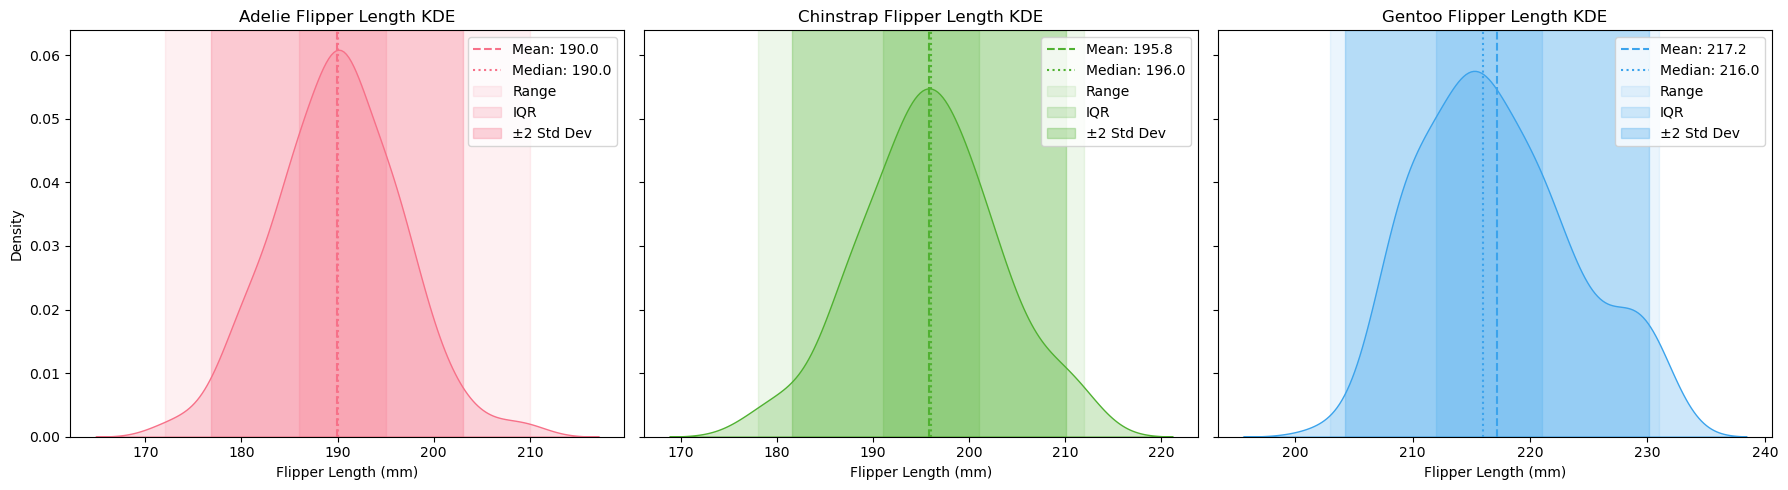

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Define a function to add statistical markers
def add_stat_markers(ax, species_data, color):
    flipper_length = species_data["flipper_length_mm"].dropna()
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    std = flipper_length.std()
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color=color, linestyle='--', label=f"Mean: {mean:.1f}")
    ax.axvline(median, color=color, linestyle=':', label=f"Median: {median:.1f}")
    
    # Add shaded regions for range, IQR, and 2-standard-deviation range
    ax.axvspan(min_val, max_val, color=color, alpha=0.1, label="Range")
    ax.axvspan(q1, q3, color=color, alpha=0.2, label="IQR")
    ax.axvspan(mean - 2*std, mean + 2*std, color=color, alpha=0.3, label="±2 Std Dev")

# Set up the figure and axes
species_list = penguins["species"].dropna().unique()
colors = sns.color_palette("husl", len(species_list))
fig, axes = plt.subplots(1, len(species_list), figsize=(18, 5), sharey=True)

# Plot KDE for each species
for i, species in enumerate(species_list):
    ax = axes[i]
    species_data = penguins[penguins["species"] == species]
    sns.kdeplot(x=species_data["flipper_length_mm"], ax=ax, color=colors[i], fill=True)
    
    # Add statistical markers
    add_stat_markers(ax, species_data, colors[i])
    
    ax.set_title(f"{species} Flipper Length KDE")
    ax.set_xlabel("Flipper Length (mm)")
    ax.legend()

plt.tight_layout()
plt.show()


Question 3

I prefer box plots over the others as I feel it shows a good amount of data in an easily digestible fashion.

Question 4:

In [ ]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. None
2. A, B, C
3. None
4. C and D

Here’s a summary of our conversation so far:

Statistical Visualization Techniques:

Box Plots: Summarize data using five statistics (minimum, first quartile, median, third quartile, maximum) and show outliers.
Histograms: Represent the frequency distribution of data points in specified intervals.
Kernel Density Estimators (KDE): Similar to histograms but provide a smooth curve representing the data distribution.
Pros and Cons of Each Technique:

Box Plots:

Pros: Summarize statistics, highlight outliers, facilitate comparison, and are robust.
Cons: Limited detail, potential difficulty in interpretation, and less informative with small datasets.
Histograms:

Pros: Visualize frequency, represent shape, and are simple to create.
Cons: Sensitive to binning, loss of detail, and do not explicitly show outliers.
Kernel Density Estimators (KDE):

Pros: Provide smooth representation, flexibility in bandwidth adjustment, and no binning issues.
Cons: Sensitive to bandwidth choice, potentially less intuitive, and may require more computational resources.
General Insight: Each visualization technique has its strengths and weaknesses, and it's often beneficial to use multiple methods for a comprehensive understanding of the data.

Question 5

Right-skewed distributions tend to have a higher mean than median, while left-skewed distributions show the opposite.

Question 6

In the Titanic dataset you can see survival rate was very different between men and women as well as different classes. You can also see most passengers were young adults.

https://chatgpt.com/share/66f62c13-7ab8-8004-9b19-28b5f42ded42